In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df =pd.read_csv("C:\\Users\\kalpana\\Downloads\\Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
le = preprocessing.LabelEncoder()

In [5]:
df["ShelveLoc"]=le.fit_transform(df["ShelveLoc"])
df["Urban"]=le.fit_transform(df["Urban"])
df["US"]=le.fit_transform(df["US"])

In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [8]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [9]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [10]:
df=df.assign(Sale=pd.cut(df['Sales'], 
                               bins=[ 0, 4, 9,15], 
                               labels=['Low', 'Medium', 'High']))

In [11]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Medium


In [12]:
import seaborn as sns

<AxesSubplot:>

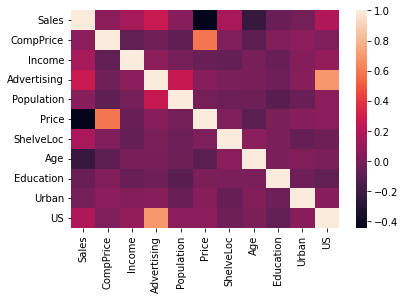

In [13]:
# correlation matrix
sns.heatmap(df.corr())

In [14]:
target = pd.DataFrame.astype(df['Sale'], dtype="object")
df1 = df.copy()
df1 = df1.drop('Sale', axis =1)

In [15]:
x=df1

In [16]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [17]:
x.drop(labels=['Sales'],axis=1,inplace=True)

In [18]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [19]:
target = target.fillna('').apply(str)
target

0        High
1        High
2        High
3      Medium
4      Medium
        ...  
395      High
396    Medium
397    Medium
398    Medium
399      High
Name: Sale, Length: 400, dtype: object

In [20]:
#label encoding
y = le.fit_transform(target)
y

array([1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 2, 1, 1, 3, 3, 1, 1, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3, 2, 2, 3, 1, 3,
       3, 3, 1, 3, 2, 1, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3,
       1, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 2, 1, 3, 1, 1, 1, 3, 3,
       3, 3, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 3, 3, 1, 3, 1, 1, 3, 0, 3,
       3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 2, 3, 3, 1, 1,
       1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 2, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 2, 1, 1, 3,

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [24]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6737500000000001
Mean Squared Error: 0.6715625
Root Mean Squared Error: 0.8194891701541882


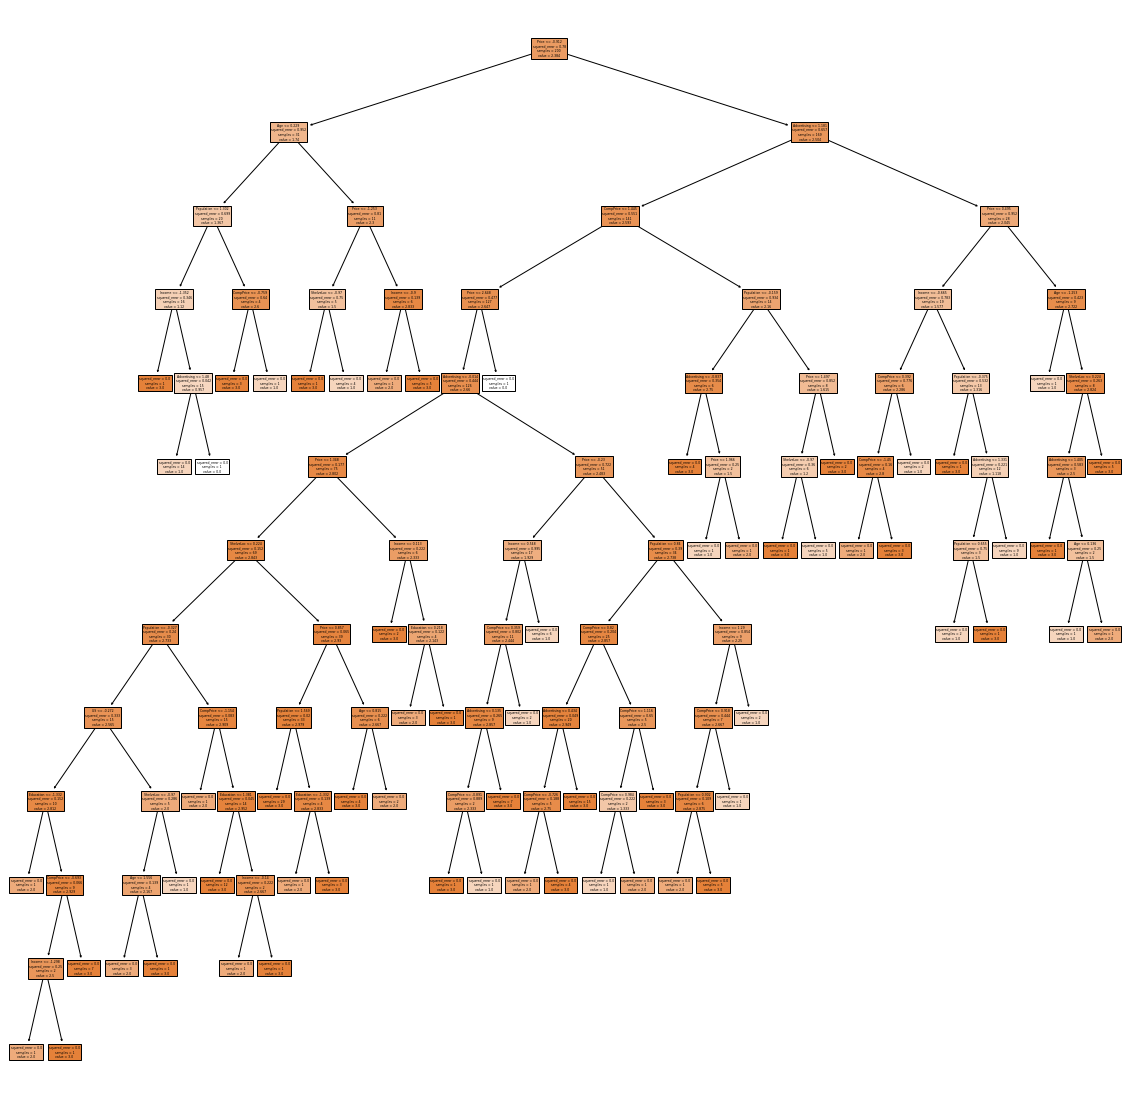

In [96]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(regressor.estimators_[0], feature_names=x.columns, filled=True)

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

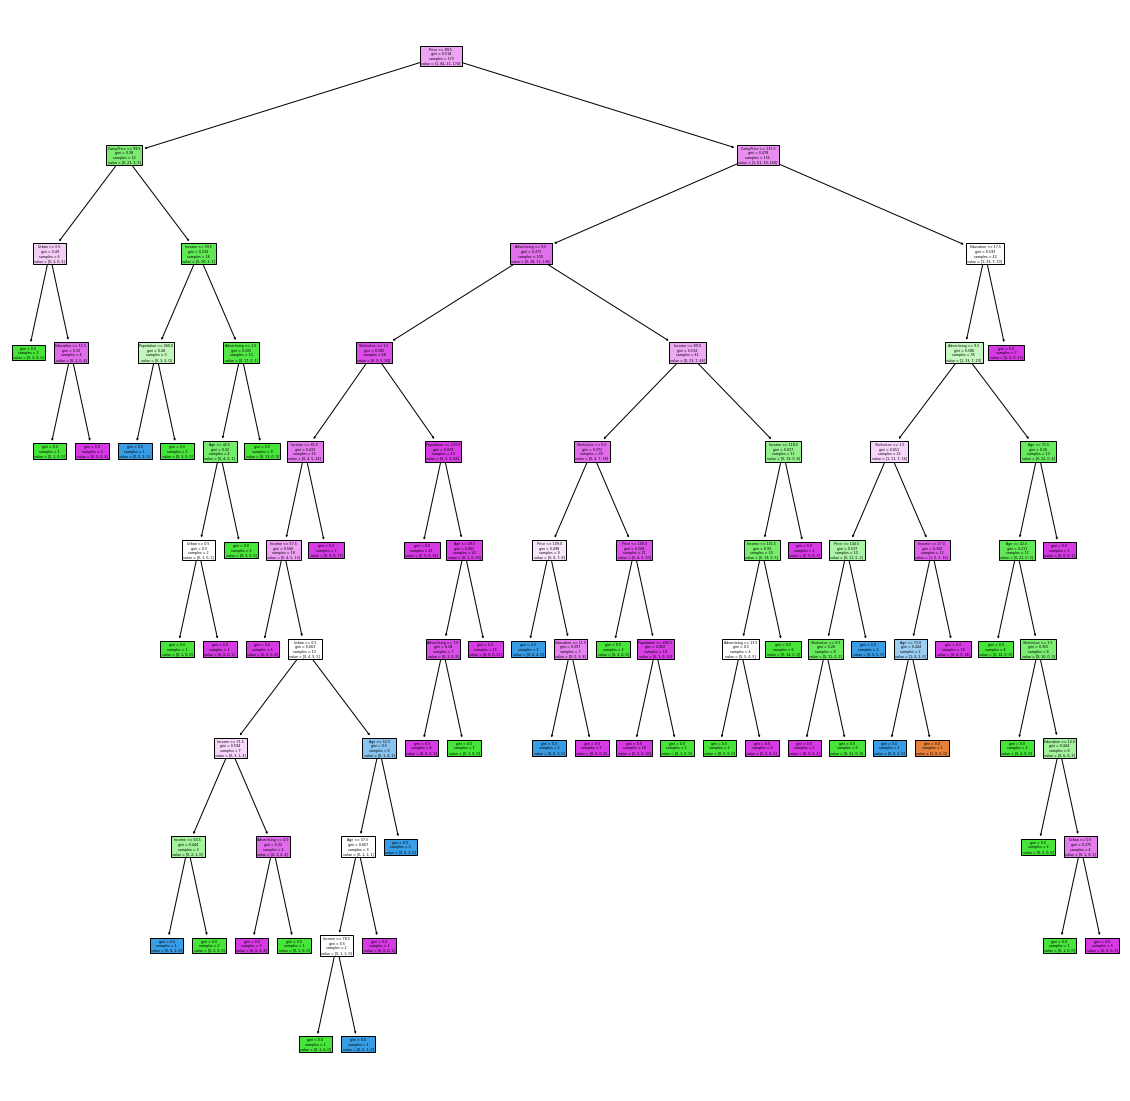

In [84]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=x.columns, filled=True)

# Bagged Decision Trees for Classification

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [26]:

kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=1)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7350000000000001


In [27]:

model.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [28]:
pred1 = model.predict(X_test)

In [29]:
pred1

array([3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 2, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1])

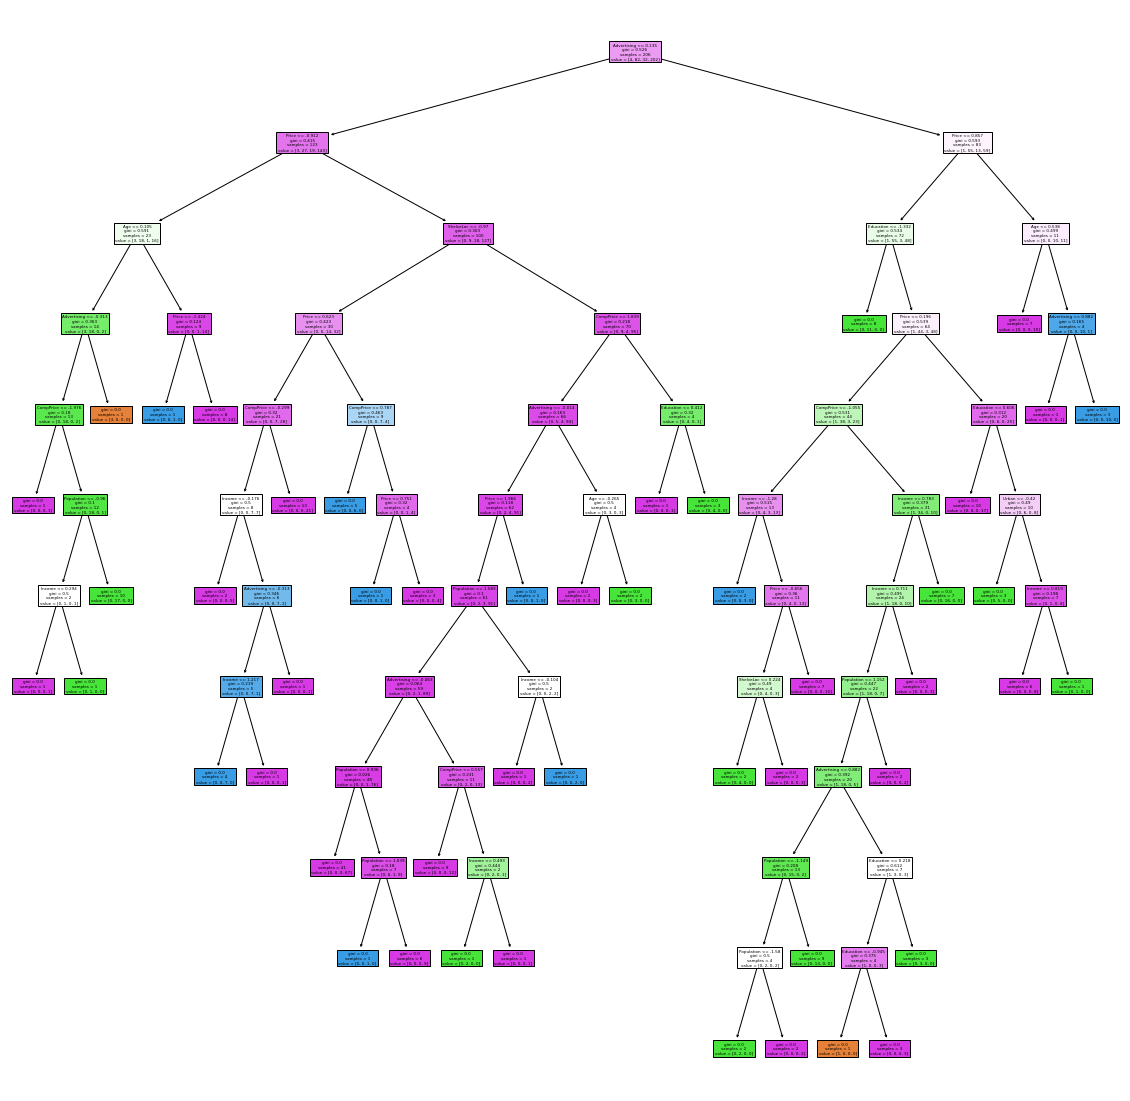

In [85]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=x.columns, filled=True)

# AdaBoost Classification

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model1 = AdaBoostClassifier(base_estimator=cart, n_estimators=num_trees, random_state=1)
results = cross_val_score(model1, x, y, cv=kfold)
print(results.mean())

0.6575


In [91]:
model1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=1)

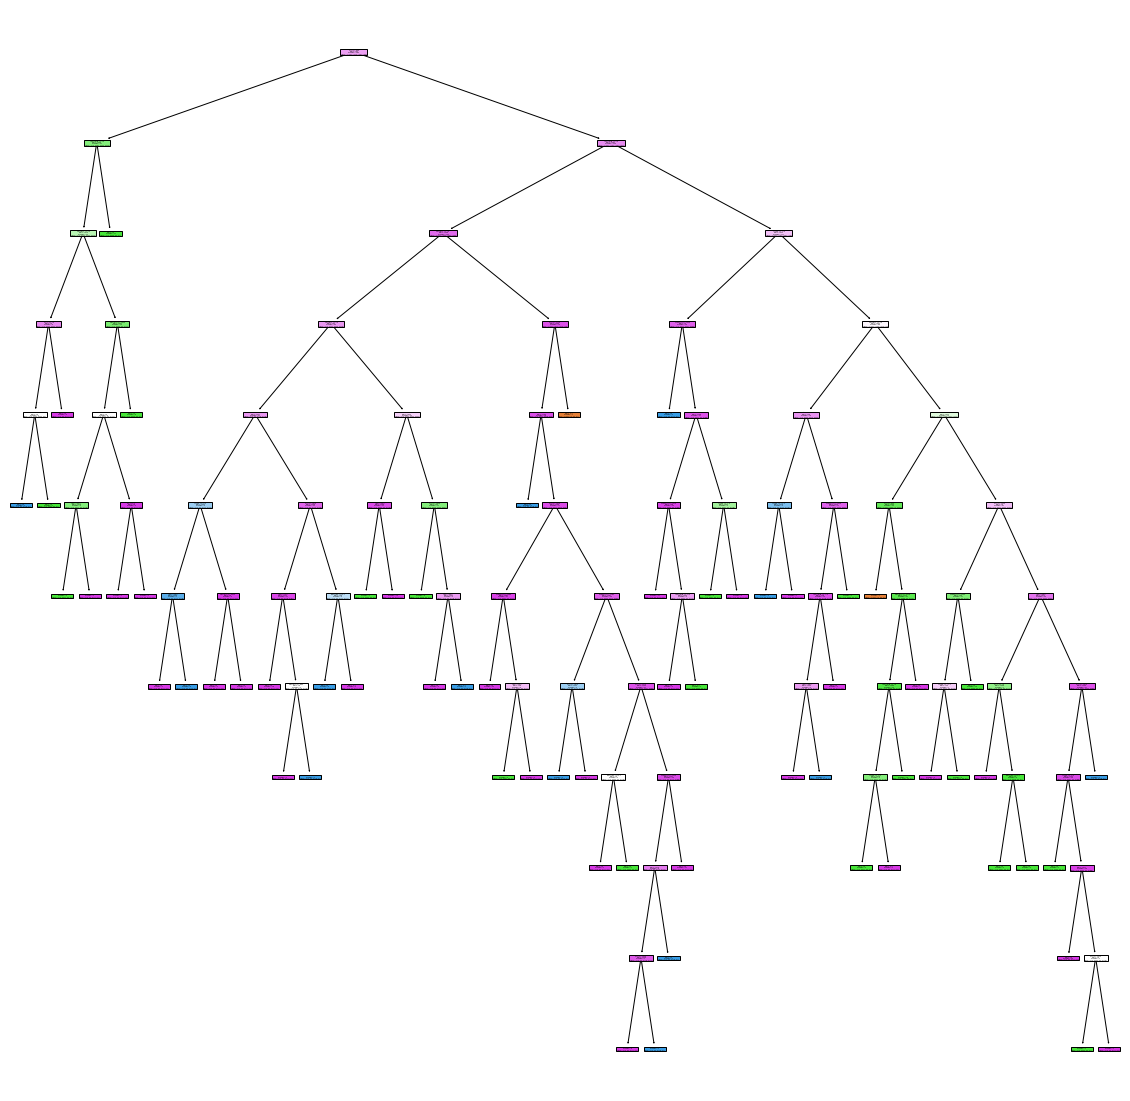

In [92]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model1.estimators_[0], feature_names=x.columns, filled=True)

# Stacking Ensemble for Classification

# ensemble model 1


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [94]:
kfold = KFold(n_splits=10, random_state=10,shuffle=True)


In [114]:
import warnings
warnings.filterwarnings('ignore')

In [118]:

#Different models initialised
log_clf_1 = LogisticRegression(random_state=0)
log_clf_2 = LogisticRegression(random_state=42)
decision_clf1 = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
decision_clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state=42)


#Creation of list of models
Model_List=[('Logistic Regression 1', log_clf_1),
            ('Logistic Regression 2', log_clf_2),
            ('Decision Tree 1', decision_clf1),
            ('Decision Tree 2', decision_clf2)]

In [120]:
#Splitting into train and test dataset
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=0)


#Initialising hard voting model
voting_clf_hard = VotingClassifier(estimators = Model_List,
                                   voting = 'hard')

#Fitting the data
voting_clf_hard.fit(X_train, y_train)

#Scoring the model for test
hard_voting_score=voting_clf_hard.score(X_test,y_test)
print("Hard Voting Test Accuracy:%.2f"%hard_voting_score)

#Initialising soft voting model
voting_clf_soft = VotingClassifier(estimators = Model_List,voting = 'soft')


#Fitting the data
voting_clf_soft.fit(X_train, y_train)

#Scoring the model for test
soft_voting_score= voting_clf_soft.score(X_test,y_test)
print("Soft Voting Test Accuracy: %.2f"%soft_voting_score)

Hard Voting Test Accuracy:0.65
Soft Voting Test Accuracy: 0.62


# ensemble model 2

In [121]:
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
model4 = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7175


# RandomForestRegressor Visualize

In [35]:
y1=pd.DataFrame(y_pred.copy(), columns=['sale_pred'])
df2 = pd.concat([df.copy(),y1], axis=1)
df2 .head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale,sale_pred
0,9.50,138,73,11,276,120,0,42,17,1,1,High,2.20
1,11.22,111,48,16,260,83,1,65,10,1,1,High,2.35
2,10.06,113,35,10,269,80,2,59,12,1,1,High,2.55
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium,2.55
4,4.15,141,64,3,340,128,0,38,13,1,0,Medium,2.30


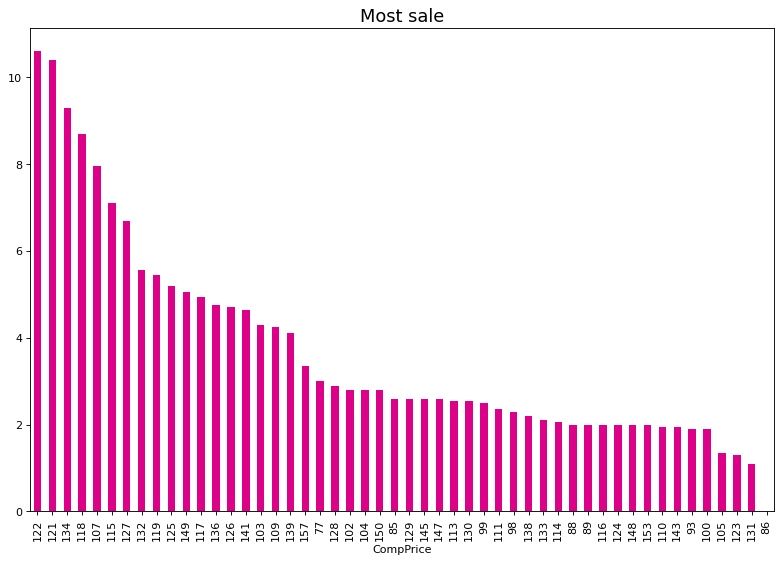

In [36]:
compprice=df2.groupby("CompPrice")["sale_pred"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
compprice.plot.bar(color="#dd0088")
plt.title("Most sale",fontsize=16)
plt.show()

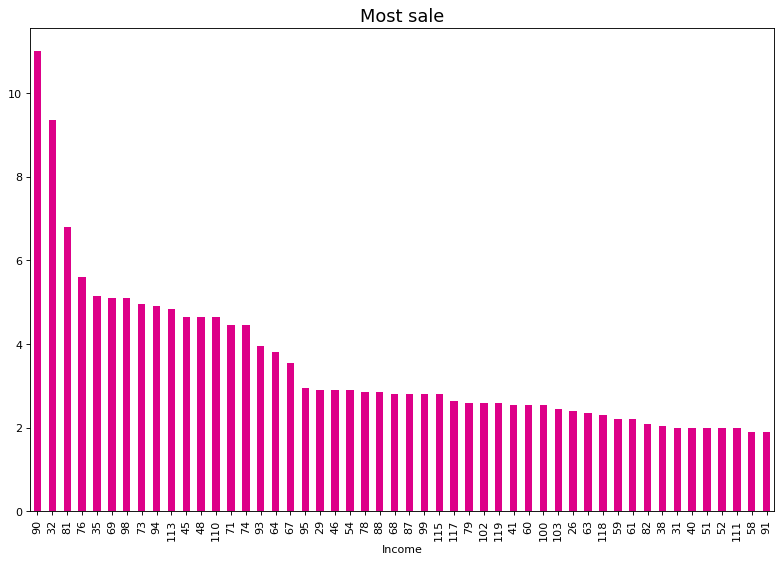

In [37]:
Income=df2.groupby("Income")["sale_pred"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
Income.plot.bar(color="#dd0088")
plt.title("Most sale",fontsize=16)
plt.show()

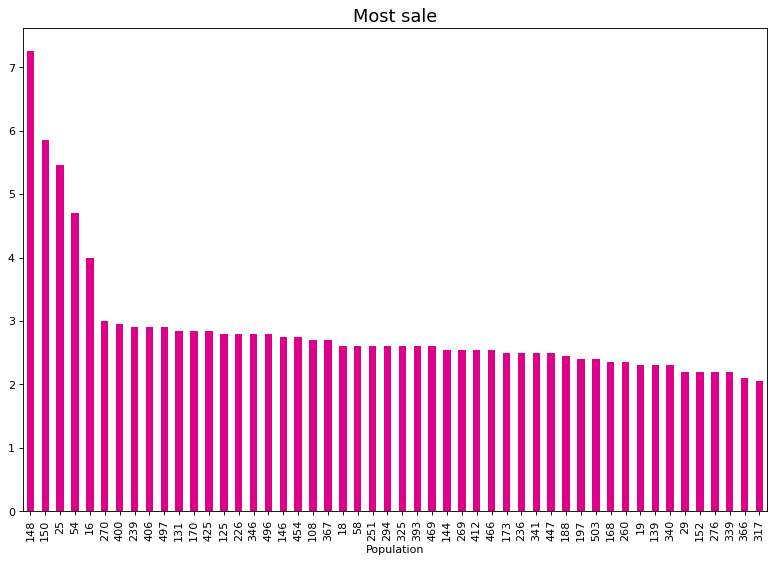

In [38]:
Population=df2.groupby("Population")["sale_pred"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
Population.plot.bar(color="#dd0088")
plt.title("Most sale",fontsize=16)
plt.show()

# AdaBoostClassifier Visualize

In [39]:
y2=pd.DataFrame(pred1.copy(), columns=['sale_pred'])
df3 = pd.concat([df.copy(),y2], axis=1)
df3 .head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale,sale_pred
0,9.50,138,73,11,276,120,0,42,17,1,1,High,3.0
1,11.22,111,48,16,260,83,1,65,10,1,1,High,3.0
2,10.06,113,35,10,269,80,2,59,12,1,1,High,3.0
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium,3.0
4,4.15,141,64,3,340,128,0,38,13,1,0,Medium,3.0


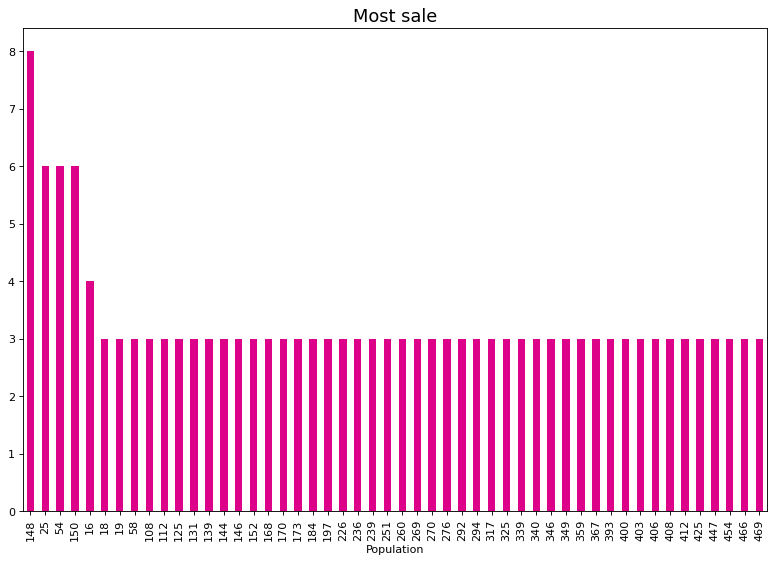

In [40]:
Population=df3.groupby("Population")["sale_pred"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
Population.plot.bar(color="#dd0088")
plt.title("Most sale",fontsize=16)
plt.show()

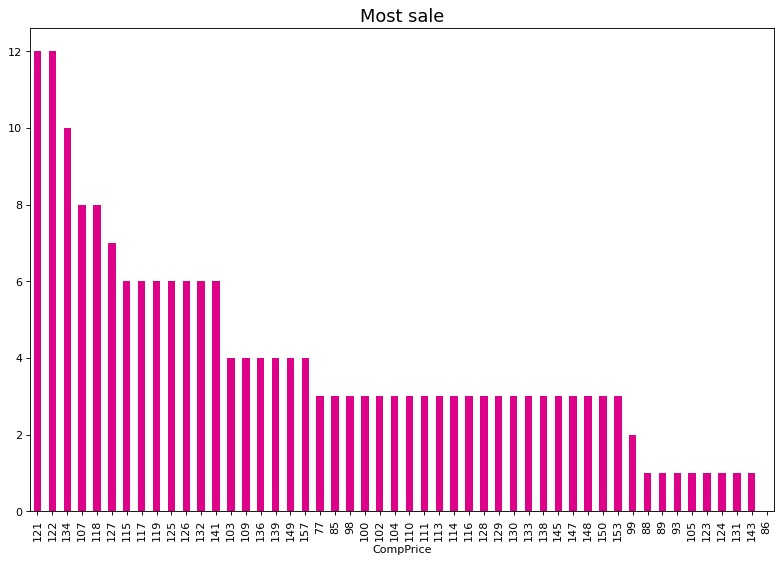

In [41]:
compprice=df3.groupby("CompPrice")["sale_pred"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
compprice.plot.bar(color="#dd0088")
plt.title("Most sale",fontsize=16)
plt.show()

In [43]:
#Actual data

(-1.1144279074565924,
 1.1006870432122187,
 -1.1117615010973978,
 1.1112370820653896)

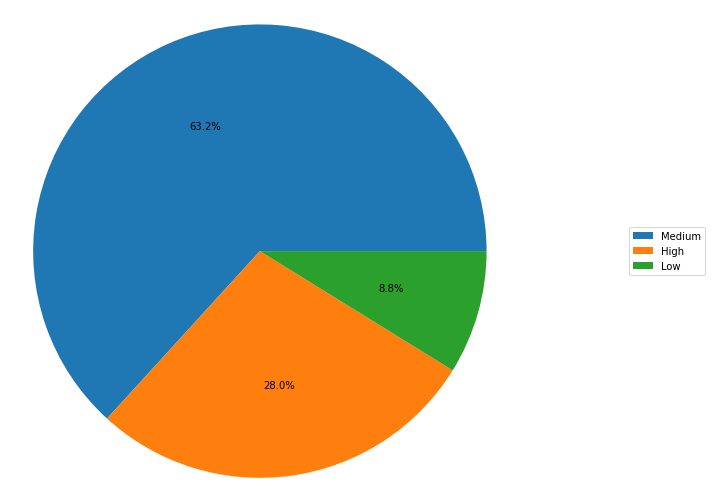

In [44]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = df["Sale"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

In [45]:
# using random forest regression model

In [46]:
df2=df2.assign(Sale_pr=pd.cut(df2['sale_pred'], 
                               bins=[0,1,2,3], 
                               labels=['Low', 'Medium', 'High']))

(-1.1033932043271177,
 1.1001616160262648,
 -1.1035450131326399,
 1.1019121335980906)

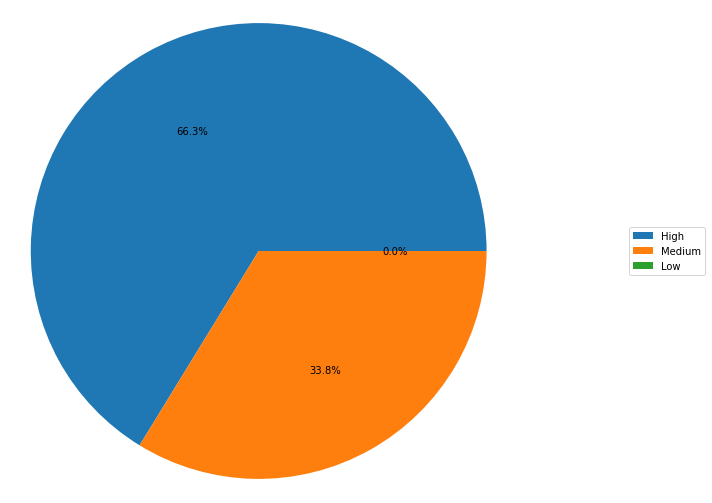

In [47]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = df2["Sale_pr"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

In [48]:
# AdaBoostClassifier model

In [49]:
df3=df3.assign(Sale_pr1=pd.cut(df3['sale_pred'], 
                               bins=[0,1,2,3], 
                               labels=['Low', 'Medium', 'High']))

(-1.1178503683072794,
 1.100850017538442,
 -1.1098282814443459,
 1.115563795599286)

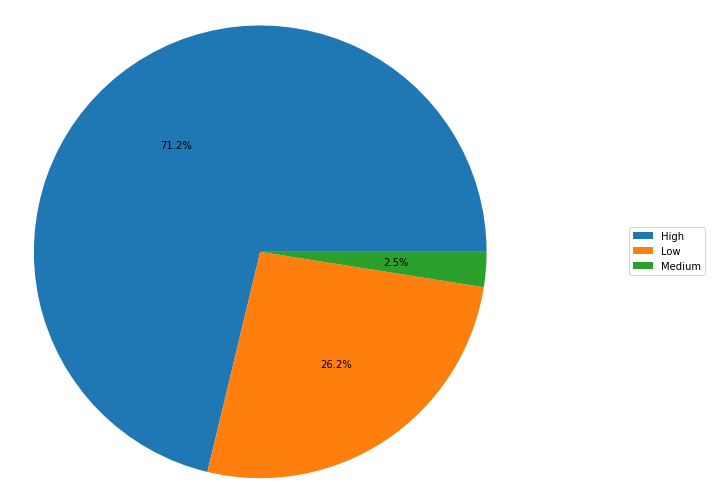

In [50]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = df3["Sale_pr1"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")